# Manipulate atomic configurations

This Notebook provides a quick outline on using atomman to manipulate atomic configurations.  

In [23]:
import numpy as np

import atomman as am

## 1. Atomic configuration basics

In atomman, atomic configurations are represented using three basic objects

- __Box__ represents the system box using three lattice vectors a, b, c, and an origin coordinate.  It has conversion tools to different representations as well as utility methods for crystal symmetry, Miller vectors and planes, and identifying if points are inside/outside.
- __Atoms__ represents a list of atoms.  By default, all atoms have an integer atype and a 3-coordinate pos.  Other properties can be freely assigned as long as the value for each atom is of the same data type and shape.
- __System__ combines a Box object, an Atoms object, periodic boundary condition flags, and the list atom model symbols.  Built-in methods support simple atomic analysis, manipulations, and conversion to alternate atomic configuration representations.

In [2]:
# Simple example: manually define an fcc unit cell
box = am.Box.cubic(a=4.05)                  # class methods exist for all 7 crystal symmetry families

atoms = am.Atoms(atype = 1, 
                 pos = [[0.0, 0.0, 0.0],
                        [0.5, 0.5, 0.0],
                        [0.5, 0.0, 0.5], 
                        [0.0, 0.5, 0.5]])

ucell = am.System(atoms = atoms,
                  box = box,
                  scale = True,              # scale=True scales atom pos to box vectors
                  symbols = 'Al')  

print(ucell)

avect =  [ 4.050,  0.000,  0.000]
bvect =  [ 0.000,  4.050,  0.000]
cvect =  [ 0.000,  0.000,  4.050]
origin = [ 0.000,  0.000,  0.000]
natoms = 4
natypes = 1
symbols = ('Al',)
pbc = [ True  True  True]
per-atom properties = ['atype', 'pos']
     id |   atype |  pos[0] |  pos[1] |  pos[2]
      0 |       1 |   0.000 |   0.000 |   0.000
      1 |       1 |   2.025 |   2.025 |   0.000
      2 |       1 |   2.025 |   0.000 |   2.025
      3 |       1 |   0.000 |   2.025 |   2.025


## 2. Box tool examples

The box parameters can be retrieved in a variety of different formats.  You can also define a box with any complete set of parameters.

In [3]:
print('vects')
print(ucell.box.vects)
print()

print('origin')
print(ucell.box.origin)
print()

print('avect, bvect, cvect')
print(ucell.box.avect)
print(ucell.box.bvect)
print(ucell.box.cvect)
print()

print('a, b, c, alpha, beta, gamma')
print(ucell.box.a, ucell.box.b, ucell.box.c)
print(ucell.box.alpha, ucell.box.beta, ucell.box.gamma)
print()

print('box lengths, lo/hi, and tilts')
print(ucell.box.lx, ucell.box.ly, ucell.box.lz)
print(ucell.box.xlo, ucell.box.xhi, ucell.box.ylo, ucell.box.yhi, ucell.box.zlo, ucell.box.zhi)
print(ucell.box.xy, ucell.box.xz, ucell.box.yz)

vects
[[4.05 0.   0.  ]
 [0.   4.05 0.  ]
 [0.   0.   4.05]]

origin
[0. 0. 0.]

avect, bvect, cvect
[4.05 0.   0.  ]
[0.   4.05 0.  ]
[0.   0.   4.05]

a, b, c, alpha, beta, gamma
4.05 4.05 4.05
90.0 90.0 90.0

box lengths, lo/hi, and tilts
4.05 4.05 4.05
0.0 4.05 0.0 4.05 0.0 4.05
0.0 0.0 0.0


Some basic utility methods

In [4]:
ucell.box.volume

66.43012499999999

In [5]:
ucell.box.reciprocal_vects

array([[0.24691358, 0.        , 0.        ],
       [0.        , 0.24691358, 0.        ],
       [0.        , 0.        , 0.24691358]])

In [6]:
ucell.box.inside([0.0, 0.0, 0.0])

True

In [7]:
ucell.box.inside([-0.1, 0.0, 0.0])

False

Crystal symmetry methods (there is one "is" method for each of the 7 families)

In [8]:
ucell.box.iscubic()

True

In [9]:
ucell.box.ishexagonal()

False

In [10]:
ucell.box.identifyfamily()

'cubic'

Miller vector and plane operations, and pos conversions

In [11]:
ucell.box.vector_crystal_to_cartesian([1,1,1])

array([4.05, 4.05, 4.05])

In [12]:
ucell.box.plane_crystal_to_cartesian([1,1,1])

array([0.57735027, 0.57735027, 0.57735027])

In [13]:
ucell.box.d_hkl([1,1,1])

2.3382685902179863

In [14]:
ucell.box.position_relative_to_cartesian([0.5, 0.5, 0.5])

array([2.025, 2.025, 2.025])

In [15]:
ucell.box.position_cartesian_to_relative([2.025, 2.025, 2.025])

array([0.5, 0.5, 0.5])

## 3. Atoms tools examples

In [16]:
ucell.atoms.natoms

4

In [17]:
ucell.atoms.natypes

1

prop() can be used to see names of set properties, set values and retrieve values

In [27]:
ucell.atoms.prop()

['atype', 'pos', 'stress']

But it is typically easier to interact with properties as attributes

In [28]:
ucell.atoms.pos

array([[0.   , 0.   , 0.   ],
       [2.025, 2.025, 0.   ],
       [2.025, 0.   , 2.025],
       [0.   , 2.025, 2.025]])

In [24]:
# Set per-atom stresses as 3x3 matrices of 0's for all atoms
ucell.atoms.stress = np.zeros([4,3,3])

In [ ]:
ucell.atoms.prop()

In [25]:
# Show stress value for atom 0
ucell.atoms.stress[0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

You can also convert the data to a df to view values in a table format.  **Caution!** The df is built by copying the data into a DataFrame!

In [21]:
ucell.atoms.df()

atype  pos[0]  pos[1]  pos[2]
0      1   0.000   0.000   0.000
1      1   2.025   2.025   0.000
2      1   2.025   0.000   2.025
3      1   0.000   2.025   2.025

## 4. System tools examples

### 4.1. Basic info

In [30]:
ucell.natoms

4

In [32]:
ucell.composition

'Al'

### 4.2. Position analysis

- __dvect()__ finds shortest vectors between points taking account of pbcs. Points can be given either as coordinates or atom ids.
- __dmag()__ finds magnitudes of the shortest vectors between points taking account of pbcs.  Points can be given either as coordinates or atom ids.
- __r0()__ finds the shortest interatomic separation distance in the cell.  Can be costly for large systems.

In [33]:
ucell.dvect(0, [1,2,3])  # Find dvects between first atom and the rest

array([[2.025, 2.025, 0.   ],
       [2.025, 0.   , 2.025],
       [0.   , 2.025, 2.025]])

In [35]:
ucell.dmag([2.025, 2.025, 2.025], [0,1,2,3])  # Find dmags between center of ucell and the atom points

array([3.50740289, 2.025     , 2.025     , 2.025     ])

In [36]:
ucell.r0()

2.8637824638055176

### 4.3. System manipulations

- __rotate()__ the system using Miller(-Bravais) integer vectors relative to the current box vectors. Creates a new system such that atoms remain coherent across periodic boundaries.
- __supersize()__ the system by multiplying along the box directions in postive and/or negative directions. 
- __box_set()__ changes the box dimensions with the option to leave atoms at either absolute Cartesian or box-vector-relative positions.
- __atoms_extend()__ creates a new System with the current atoms plus extras.
- __atoms_ix()__ creates a new System based on taking a slice of the old system's atoms list.  Numpy-style indexing is used for selecting the atoms.
- __wrap()__ adjusts the system so all atoms are within the box boundaries. This is done by wrapping atoms around periodic boundaries and extending non-periodic boundaries as needed.

In [37]:
# Rotate such that the [111] direction is along the x-axis
uvws = [
    [ 1, 1, 1],
    [ 1,-2, 1],
    [ 1, 0,-1]
]
rcell = ucell.rotate(uvws)
print(rcell)

avect =  [ 7.015,  0.000,  0.000]
bvect =  [ 0.000,  9.920,  0.000]
cvect =  [ 0.000,  0.000,  5.728]
origin = [ 0.000,  0.000,  0.000]
natoms = 24
natypes = 1
symbols = ('Al',)
pbc = [ True  True  True]
per-atom properties = ['atype', 'pos', 'stress']
     id |   atype |  pos[0] |  pos[1] |  pos[2]
      0 |       1 |   0.000 |   2.480 |   4.296
      1 |       1 |   0.000 |   9.920 |   2.864
      2 |       1 |   0.000 |   7.440 |   4.296
      3 |       1 |   0.000 |   7.440 |   1.432
      4 |       1 |   2.338 |   9.094 |   4.296
      5 |       1 |   0.000 |   2.480 |   1.432
      6 |       1 |   0.000 |   4.960 |   0.000
      7 |       1 |   0.000 |   4.960 |   2.864
      8 |       1 |   2.338 |   4.134 |   4.296
      9 |       1 |   2.338 |   6.614 |   2.864
     10 |       1 |   2.338 |   4.134 |   1.432
     11 |       1 |   4.677 |   5.787 |   4.296
     12 |       1 |   0.000 |   9.920 |   0.000
     13 |       1 |   2.338 |   1.653 |   0.000
     14 |       1 |   2.338

In [38]:
# Multiply system along all three box directions. (0,0,0) coordinate is in the center of the system.
system = rcell.supersize((-4, 4), (-3, 3), (-5, 5))

print(system.box)
print(system.natoms)

avect =  [56.118,  0.000,  0.000]
bvect =  [ 0.000, 59.523,  0.000]
cvect =  [ 0.000,  0.000, 57.276]
origin = [-28.059, -29.761, -28.638]
11520


### 4.4. Neighbor lists

In [39]:
nlist = system.neighborlist(cutoff = 1.1 * ucell.r0())

In [41]:
nlist.coord.mean()

12.0

In [42]:
nlist[0]

array([   5,    7,    8,   14,  183,  184,  191,  961, 1157, 1158, 1165,
       2124], dtype=int64)

## 5. Run a LAMMPS simulation

There are tools in atomman that also help set up, run, and analyze LAMMPS simulations.

### 5.1. Define commands

To run LAMMPS simulations using atomman, you need to specify a LAMMPS executable to interact with, and optionally an mpi command to use for running LAMMPS in parallel.

In [11]:
if iscolab:
    # LAMMPS and MPI commands to use in colab
    lammps_command = '/content/lmp'
    mpi_command = None

    
else:
    # LAMMPS and MPI commands for local runs
    # MAY BE DIFFERENT FOR YOUR SYSTEM!
    lammps_command = 'lmp_serial'
    mpi_command = None #'mpiexec -localonly 6'
    
# Test that the lammps executable works and print LAMMPS version
print('Using LAMMPS version', am.lammps.checkversion(lammps_command)['version'])

Using LAMMPS version 3 Mar 2020


### 5.2. Save initial configuration

The system can be saved/converted to a variety of different formats using the system.dump() method. Like atomman.load(), dump has a variety of styles that support different formats.

- __Local file styles__
    - 'atom_data' LAMMPS data - Also generates LAMMPS input commands to read the file in!
    - 'atom_dump' LAMMPS dump
    - 'lammps_commands' builds LAMMPS commands lattice, create_box, create_atoms, etc
    - 'poscar'
    - 'pdb'
    - 'system_model' JSON schema used by atomman
- __Transformed systems__
    - 'conventional_to_primitive' converts conventional unit cells to primitive ones based on a known basis setting
    - 'primitive_to_conventional' converts primitive unit cells to conventional ones based on a known basis setting
    - 'primitive_cell' uses spglib to identify the primitive unit cell for the system
- __Alternate Python representations__
    - 'ase_Atoms'
    - 'phonopy_Atoms'
    - 'pymatgen_Structure'
    - 'spglib_cell'

Create a LAMMPS data file called 'init.dat' and build the associated LAMMPS input commands.  Passing in the potential also creates the appropriate LAMMPS commands for the potential and ensures compatibility.

In [12]:
system_pair_info = sphere_system.dump('atom_data', f='run/init.dat', potential=potential)
print(system_pair_info)

units metal
atom_style atomic

boundary m m m
read_data run/init.dat

print "Potential 2003--Zope-R-R--Al--LAMMPS--ipr1 listed in the NIST Interatomic Potentials Repository:"
print "https://www.ctcms.nist.gov/potentials/entry/2003--Zope-R-R-Mishin-Y--Al/2003--Zope-R-R--Al--LAMMPS--ipr1.html"
print "Publication(s) related to the potential:"
print "https://doi.org/10.1103/physrevb.68.024102"
print "Parameter file(s) can be downloaded at:"
print "https://www.ctcms.nist.gov/potentials/Download/2003--Zope-R-R-Mishin-Y--Al/2/Al03.eam.alloy"
print "https://www.ctcms.nist.gov/potentials/Download/2003--Zope-R-R-Mishin-Y--Al/2/Al03_releaseNotes_1.pdf"

pair_style eam/alloy 
pair_coeff * * 2003--Zope-R-R--Al--LAMMPS--ipr1\Al03.eam.alloy Al

mass 1 26.982




### 5.3. Create a LAMMPS input script

Performing the atomistic calculations is left to simulators such as LAMMPS.  But, the tools in atomman make it easy to transform a LAMMPS input script for a specific calculation into a template script where important values are filled in by Python variables.  This helps make the scripts more reusable and adaptable, along with facilitating high throughput runs.

An example LAMMPS script template is presented below where the terms inside angle brackets \<\> are to be filled in by Python.

In [13]:
template = """
# Simple script to perform an nvt LAMMPS relaxation

# Calculation settings
variable temperature equal <temperature>
variable runsteps equal <runsteps>
variable dumpsteps equal <dumpsteps>
variable twotemp equal 2*${temperature}

# Configuration and potential information
<atomman_system_pair_info>

# Define computes
compute pe all pe/atom
compute ke all ke/atom

# Define thermo outputs
thermo 100
thermo_style custom step temp pe ke etotal
thermo_modify format float %.13e
timestep 0.001

# Initialize temperature and define integrator
velocity all create ${twotemp} 8675309
fix nvt all nvt temp ${temperature} ${temperature} 0.1

# Specify dump file info
dump dumpit all custom ${dumpsteps} run/*.dump id type x y z c_pe c_ke
dump_modify dumpit format float %.13e

# Run
run ${runsteps}
"""

Once you have a template script, you can fill it in to create a full LAMMPS script with atomman.tools.filltemplate().  This method takes four arguments: the template, a dict of values to fill in, starting delimiter string, and ending delimiter string for identifying the terms to replace.

In [14]:
lammps_variables = {}
lammps_variables['atomman_system_pair_info'] = system_pair_info
lammps_variables['temperature'] = 600
lammps_variables['runsteps'] = 100000
lammps_variables['dumpsteps'] = lammps_variables['runsteps']

# The '<', '>' indicate that the template terms to replace are surrounded by angle brackets.
script = am.tools.filltemplate(template, lammps_variables, '<', '>')
print(script)


# Simple script to perform an nvt LAMMPS relaxation

# Calculation settings
variable temperature equal 600
variable runsteps equal 100000
variable dumpsteps equal 100000
variable twotemp equal 2*${temperature}

# Configuration and potential information
units metal
atom_style atomic

boundary m m m
read_data run/init.dat

print "Potential 2003--Zope-R-R--Al--LAMMPS--ipr1 listed in the NIST Interatomic Potentials Repository:"
print "https://www.ctcms.nist.gov/potentials/entry/2003--Zope-R-R-Mishin-Y--Al/2003--Zope-R-R--Al--LAMMPS--ipr1.html"
print "Publication(s) related to the potential:"
print "https://doi.org/10.1103/physrevb.68.024102"
print "Parameter file(s) can be downloaded at:"
print "https://www.ctcms.nist.gov/potentials/Download/2003--Zope-R-R-Mishin-Y--Al/2/Al03.eam.alloy"
print "https://www.ctcms.nist.gov/potentials/Download/2003--Zope-R-R-Mishin-Y--Al/2/Al03_releaseNotes_1.pdf"

pair_style eam/alloy 
pair_coeff * * 2003--Zope-R-R--Al--LAMMPS--ipr1\Al03.eam.alloy Al

mass 1

### 5.4. Run LAMMPS

LAMMPS can be executed from within Python using atomman.lammps.run(). The run() function provides a number of useful options that make managing LAMMPS simulations easier
- Scripts can be given as either strings or file paths.
- In addition to a primary script, a "restart" script can be specified to restart and continue a previous calculation if needed. The primary script is used if there is no log file, otherwise the current log file is renamed to prevent overwrite and the restart script is used.
- A LAMMPSError will be raised in Python if the calculation fails to finish properly. The output message is (usually) informative by displaying the last line of the LAMMPS message.
- If LAMMPS finishes successfully, the log information is automatically read into an atomman.lammps.Log object making it easy to interact with the data.

Alternatively, if you have already ran LAMMPS you can directly use atomman.lammps.Log to read the log.lammps content.

In [15]:
run = True

if run:
    # Run LAMMPS with the script built above
    log = am.lammps.run(lammps_command, mpi_command=mpi_command, script=script, logfile='run/log.lammps')
else:
    if not Path('run/log.lammps').exists():
        # Fetch run/log.lammps and run/100000.dump from github
        !wget -O run/log.lammps https://github.com/lmhale99/atomman-demo/raw/main/run/log.lammps
        !wget -O run/log.lammps https://github.com/lmhale99/atomman-demo/raw/main/run/100000.dump
    
    # Read the current log.lammps without running
    log = am.lammps.Log('run/log.lammps')

### 5.5. Analyze LAMMPS log results

The atomman.lammps.Log class reads a LAMMPS log file and pulls out the important data.
- Log.simulations is a list of Simulation objects which each Simulation collecting the data for a run/minimization. Each Simulation object contains both "performance" and "thermo" data that are accessible as pandas DataFrames.
- For restarted calculations, multiple log files can be read in to the same Log object. This is managed automatically by run() if a restarted calculation finishes.
- The Log.flatten() method joins the thermo data of multiple simulations together into a single DataFrame. flatten() has options for how to manage rows with the same Step values.

In [15]:
# Select the first (and only) simulation, and show performance data
sim = log.simulations[0]
sim.performance

min time    avg time    max time  %varavg  %total
Section                                                      
Pair      713.660000  713.660000  713.660000      0.0   98.17
Neigh       7.710300    7.710300    7.710300      0.0    1.06
Comm        0.049531    0.049531    0.049531      0.0    0.01
Output      0.035196    0.035196    0.035196      0.0    0.00
Modify      4.499600    4.499600    4.499600      0.0    0.62
Other       0.000000    1.008000    0.000000      0.0    0.14

In [16]:
# Show the thermo data
sim.thermo

Step         Temp        PotEng      KinEng        TotEng
0          0  1200.000000 -12963.024168  619.828247 -12343.195921
1        100   629.684962 -12667.916638  325.247105 -12342.669533
2        200   594.062538 -12645.987550  306.847285 -12339.140265
3        300   594.934122 -12657.392422  307.297479 -12350.094944
4        400   591.188890 -12669.087880  305.362978 -12363.724902
...      ...          ...           ...         ...           ...
996    99600   599.647274 -12671.740496  309.731932 -12362.008564
997    99700   595.487350 -12673.869741  307.583234 -12366.286507
998    99800   590.822539 -12670.909813  305.173749 -12365.736064
999    99900   603.070099 -12666.834363  311.499902 -12355.334461
1000  100000   608.960341 -12666.450287  314.542351 -12351.907937

[1001 rows x 5 columns]

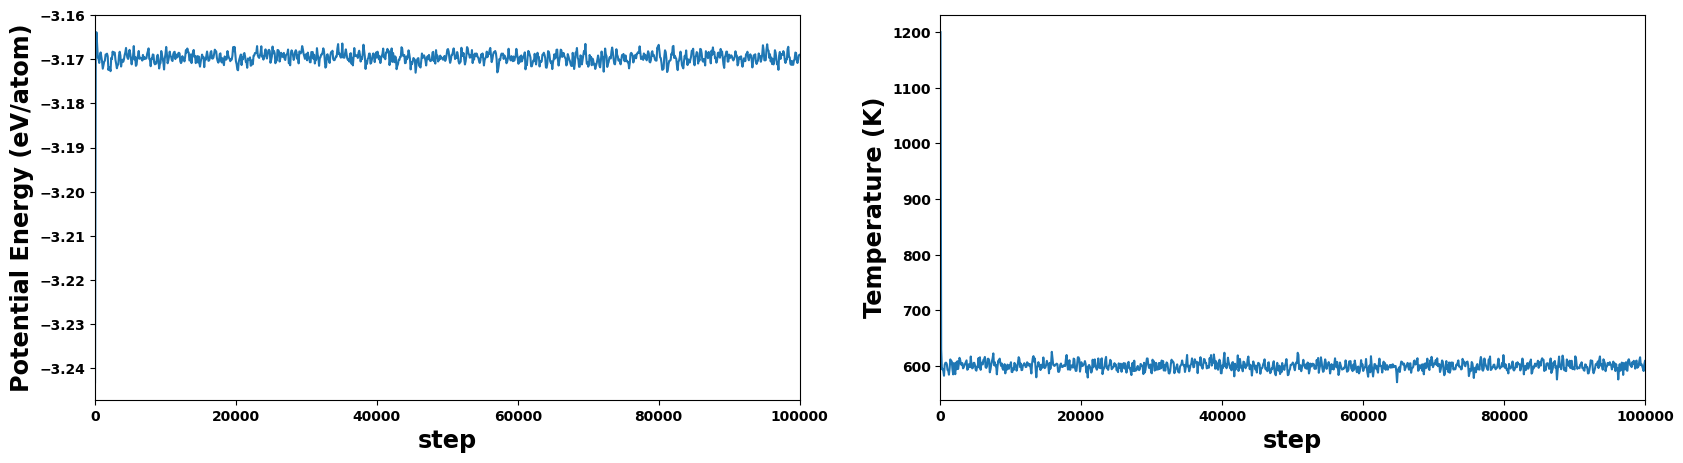

In [17]:
# Plot the thermo data
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(sim.thermo.Step, sim.thermo.PotEng / sphere_system.natoms)
axes[1].plot(sim.thermo.Step, sim.thermo.Temp)
        
axes[0].set_ylabel('Potential Energy (eV/atom)', size='xx-large')
axes[0].set_xlabel('step', size='xx-large')
axes[0].set_xlim(0, sim.thermo.Step.values[-1])

axes[1].set_ylabel('Temperature (K)', size='xx-large')
axes[1].set_xlabel('step', size='xx-large')
axes[1].set_xlim(0, sim.thermo.Step.values[-1])

plt.show()

### 5.6. Load dump files

As mentioned above, you can load a LAMMPS dump file with atomman.load()

In [18]:
# Load final dump file
relaxed_system = am.load('atom_dump', f'run/{lammps_variables["runsteps"]}.dump')

Now, the dump file provides more per-atom values beyond atype and pos. 

- List the set per-atom properties with atoms_prop()
- View per-atom values directly as attributes of atoms
- Create a DataFrame representation with atoms_df()

In [19]:
print(relaxed_system.atoms_prop())

['atype', 'pos', 'atom_id', 'c_pe', 'c_ke']


In [20]:
relaxed_system.atoms.c_pe

array([-2.79090062, -2.70801834, -2.6465782 , ..., -2.47945459,
       -2.55626277, -2.52377612])

In [21]:
relaxed_system.atoms_df()

atype    pos[0]     pos[1]     pos[2]  atom_id      c_pe      c_ke
0         1  2.024165  10.740113 -22.207974        1 -2.790901  0.031699
1         1 -7.970639   5.021274 -21.870195        2 -2.708018  0.061988
2         1  0.745776   8.410379 -22.666309        3 -2.646578  0.073036
3         1 -5.108924   2.993821 -22.988902        4 -2.682884  0.157820
4         1 -1.514163   1.178036 -23.789316        5 -2.623532  0.096306
...     ...       ...        ...        ...      ...       ...       ...
3992      1 -2.461338   0.799776  24.789699     3993 -2.384516  0.025157
3993      1  3.144746  -5.423257  22.373598     3994 -3.051140  0.213389
3994      1  5.618610  -5.403176  23.205361     3995 -2.479455  0.114556
3995      1  2.841527   1.069300  24.057664     3996 -2.556263  0.182118
3996      1  9.130894  -2.405362  22.355996     3997 -2.523776  0.028272

[3997 rows x 7 columns]

### 5.7. Structure analysis

The view_3d method allows for coloring the atoms according to a property value

In [22]:
am.plot.py3Dmol.view_3d(relaxed_system, prop_name='c_pe', height=400, width=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Using atoms_ix, we can also filter atoms by values

In [23]:
# Keep only atoms with energies > -3
has_large_pe = relaxed_system.atoms.c_pe > -3.
view_system = relaxed_system.atoms_ix[ has_large_pe ]

# Plot the filtered view system. Set cmin, cmax to be same as above
am.plot.py3Dmol.view_3d(view_system, prop_name='c_pe',
                        cmin = relaxed_system.atoms.c_pe.min(),
                        cmax = relaxed_system.atoms.c_pe.max(),
                        height=400, width=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You can also compute additional per-atom properties and save them directly to the system's atoms as scalar, vector, or tensor values.  Here, we 

In [24]:
# Compute displacement relative to the unrelaxed sphere_system
disp = am.displacement(sphere_system, relaxed_system)

# Save disp vectors to the atoms
relaxed_system.atoms.disp = disp

print('Displacement of first atom =', relaxed_system.atoms.disp[0])

Displacement of first atom = [ 2.02416482 13.22022145  2.1341765 ]


In [25]:
# View sphere colored with displacement magnitudes
am.plot.py3Dmol.view_3d(relaxed_system, prop_name='disp', prop_magnitude=True, height=400, width=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
# View sphere colored with z-axis displacements 
am.plot.py3Dmol.view_3d(relaxed_system, prop_name='disp', prop_index=2, height=400, width=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Finally, if you save the resulting system to a LAMMPS dump file using System.dump() it will include all new per-atom properties that you calculated.

In [27]:
# Dump without a filepath to create str
dumpstr = relaxed_system.dump('atom_dump', float_format = '%.6f')

# display first 20 lines of dumpstr
print('\n'.join(dumpstr.split('\n')[:20]))

ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
3997
ITEM: BOX BOUNDS fm fm fm
-28.059223 28.059223
-29.761300 29.761300
-28.637824 28.637824
ITEM: ATOMS id type x y z c_pe c_ke disp[0] disp[1] disp[2]
1 1 2.024165 10.740113 -22.207974 -2.790901 0.031699 2.024165 13.220221 2.134177
2 1 -7.970639 5.021274 -21.870195 -2.708018 0.061988 -3.294102 5.847977 2.471955
3 1 0.745776 8.410379 -22.666309 -2.646578 0.073036 3.084045 12.543893 1.675842
4 1 -5.108924 2.993821 -22.988902 -2.682884 0.157820 -0.432387 6.300632 -0.078642
5 1 -1.514163 1.178036 -23.789316 -2.623532 0.096306 0.824106 7.791658 -0.879056
6 1 0.033977 12.303290 -22.400071 -2.404437 0.020864 -2.304292 13.129993 1.942080
7 1 1.552500 5.772105 -22.479696 -2.902652 0.010622 -0.785769 9.078916 0.430563
8 1 4.708966 3.992610 -23.214264 -2.613974 0.057175 0.032428 10.606232 -0.304005
9 1 8.198061 7.973681 -21.605365 -2.431822 0.123562 -1.155013 11.280492 1.304895
10 1 -11.379415 6.671804 -21.079535 -2.407961 0.000275 -2.026340 3.364993 1.83